# Задание 1. Генераторы и python

Выполнил: Ивлев А.Д. (3824М1ПМвм)

- [Изменение характеристик](#1-проверить-как-при-изменении-числа-вершин-и-ребер-графа-изменяются-его-характеристики)
- [Hаспределение степеней](#2-распределение-степеней)
- [Пример случайного графа](#3-пример-случайного-графа)


In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1 Проверить как при изменении числа вершин и ребер графа изменяются его характеристики:

- [связность](#11-связность)
- [размер компоненты сильной связности](#12-размер-компоненты-сильной-связности)
- [размер компоненты слабой связности](#13-размер-компоненты-слабой-связности)
- [диаметр](#14-диаметр)
- [длина среднего кратчайшего пути](#15-длина-среднего-кратчайшего-пути)
- [распределение степеней](#2-распределение-степеней)
- [средний коэффициент кластеризации](#17-cредний-коэффициент-кластеризации)


Выбрана модель графов Эрдёша — Реньи. В данной модели граф строится путём случайного добавления рёбер. Каждое ребро включается в граф с вероятностью $p$ независимо от остальных рёбер. Эквивалентно, все графы с $n$ узлами и $M$ рёбрами имеют одинаковую вероятность. Параметр $p$ в этой модели можно рассматривать как функцию веса. По мере роста $p$ от 0 к 1 модель включает с большей вероятностью графы с большим числом рёбер.

Свойства графов Эрдёша — Реньи:

- Если $p={\tfrac {c\ln n}{n}}$, то при $0<с<1$ граф будет почти наверняка содержать изолированные вершины, а потому будет несвязным.
- Если $p={\tfrac {c\ln n}{n}}$, то при $с>1$ граф будет почти наверняка связен.

In [ ]:
n = 1000 # При больших долгий просчёт

mul_c = 2
p_c = 0.375
#p = p_c*np.log(n)/n 

f_table = [[],[]]

connectivity = []
strong_size = []
weak_size = []
diameter = []
average_shortest = []
degree_distribution = []
average_clustering = []

Вероятность связи рёбер высчитывается по формуле $mul\_c^j*p\_c*\frac{ln(n)}{n}$

In [16]:
n_t = n
for i in range(4):
    f_table[0].append(n_t)
    p_t = p_c*np.log(n_t)/n_t
    connectivity.append([])
    strong_size.append([])
    weak_size.append([])
    diameter.append([])
    average_shortest.append([])
    degree_distribution.append([])
    average_clustering.append([])
    for j in range(4):
        print(n_t, p_t)
        if(i == 0):
            f_table[1].append(p_c*(j+1))
        graph = nx.erdos_renyi_graph(n_t, p_t, directed = True)
        connectivity[i].append(nx.is_strongly_connected(graph))
        G_weak = graph.subgraph(max(nx.weakly_connected_components(graph), key=len))
        weak_size[i].append([G_weak.number_of_nodes(), G_weak.number_of_edges()])
        G_strong = graph.subgraph(max(nx.strongly_connected_components(graph), key=len))
        strong_size[i].append([G_strong.number_of_nodes(), G_strong.number_of_edges()])
        if(connectivity[i][j]):
            diameter[i].append(nx.diameter(graph))
            average_shortest[i].append(nx.average_shortest_path_length(graph))
        else:
            diameter[i].append(-1)
            average_shortest[i].append(-1)
        degree_distribution[i].append(sorted((d for n, d in graph.degree()), reverse=True))
        average_clustering[i].append(nx.average_clustering(graph))
        p_t*=mul_c
    n_t*=mul_c


1000 0.002590408229618301
1000 0.005180816459236602
1000 0.010361632918473205
1000 0.02072326583694641
2000 0.0014251692111641402
2000 0.0028503384223282804
2000 0.005700676844656561
2000 0.011401353689313122
4000 0.000777567153759565
4000 0.00155513430751913
4000 0.00311026861503826
4000 0.00622053723007652
8000 0.00042127485096853004
8000 0.0008425497019370601
8000 0.0016850994038741201
8000 0.0033701988077482403


### 1.1 Связность

Так как граф ориентирован, под связностью понимаем строгую связность. Можно наблюдать, что при $p\_c*mul\_c^j < 1$ нет строгой связности, а при $p\_c*mul\_c^j > 1$ есть, что соотносится с теорией.

In [18]:
pd.DataFrame(connectivity, columns=f_table[1], index=f_table[0])

,0.375,0.750,1.125,1.500
1000,False,False,True,True
2000,False,False,True,True
4000,False,False,True,True
8000,False,False,True,True


### 1.2 Размер компоненты сильной связности

Количество рёбер растёт примерно в 2 раза с увеличением в 2 раза $p$ и также растёт примерно в 2 раза с увеличением в 2 раза $n$.

Количество вершин также растёт примерно в 2 раза с увеличением в 2 раза $n$. При увеличении $p$ также наблюдается рост, но зависимость менее очевидна.

In [19]:
pd.DataFrame(strong_size, columns=f_table[1], index=f_table[0])

,0.375,0.750,1.125,1.500
1000,"[796, 1967]","[987, 5064]","[1000, 10306]","[1000, 20558]"
2000,"[1737, 4944]","[1986, 11689]","[2000, 22880]","[2000, 45545]"
4000,"[3596, 11004]","[3981, 24628]","[4000, 49822]","[4000, 99798]"
8000,"[7369, 24976]","[7990, 54188]","[8000, 108325]","[8000, 215931]"


### 1.3 Размер компоненты слабой связности

Количество рёбер растёт примерно в 2 раза с увеличением в 2 раза $p$ и также растёт примерно в 2 раза с увеличением в 2 раза $n$.

Количество вершин также растёт примерно в 2 раза с увеличением в 2 раза $n$. Зависимость от $p$ невозможно установить для данных значений, так как граф почти всегда слабо связен.

In [20]:
pd.DataFrame(weak_size, columns=f_table[1], index=f_table[0])

,0.375,0.750,1.125,1.500
1000,"[995, 2482]","[1000, 5120]","[1000, 10306]","[1000, 20558]"
2000,"[1994, 5641]","[2000, 11782]","[2000, 22880]","[2000, 45545]"
4000,"[3989, 12244]","[4000, 24754]","[4000, 49822]","[4000, 99798]"
8000,"[7995, 27121]","[8000, 54244]","[8000, 108325]","[8000, 215931]"


### 1.4 Диаметр

Для сильно связного графа диаметр уменьшается с ростом $p$. Для установления зависимости от $n$ недостаточно данных.

In [21]:
pd.DataFrame(diameter, columns=f_table[1], index=f_table[0])

,0.375,0.750,1.125,1.500
1000,-1,-1,5,4
2000,-1,-1,5,4
4000,-1,-1,6,4
8000,-1,-1,6,4


### 1.5 Длина среднего кратчайшего пути

Для сильно связного длина среднего кратчайшего пути уменьшается при росте $p$ и немного увеличивается с увеличением $n$.

In [22]:
pd.DataFrame(average_shortest, columns=f_table[1], index=f_table[0])

,0.375,0.750,1.125,1.500
1000,-1,-1,3.216391,2.622908
2000,-1,-1,3.393025,2.758438
4000,-1,-1,3.574636,2.874183
8000,-1,-1,3.727855,3.002945


### 1.6 Распределение степеней

Распределение степеней будет рассмотрено в [пункте 2](#2-распределение-степеней)

#### 1.7 Cредний коэффициент кластеризации

Cредний коэффициент кластеризации растёт примерно в 2 раза с увеличением в 2 раза $p$ и уменьшается примерно в 2 раза с увеличением в 2 раза $n$

In [23]:
pd.DataFrame(average_clustering, columns=f_table[1], index=f_table[0])

,0.375,0.750,1.125,1.500
1000,0.002382,0.004440,0.010652,0.020807
2000,0.001506,0.003191,0.005696,0.011319
4000,0.000633,0.001514,0.003085,0.006277
8000,0.000368,0.000827,0.001698,0.003369


## 2 Распределение степеней

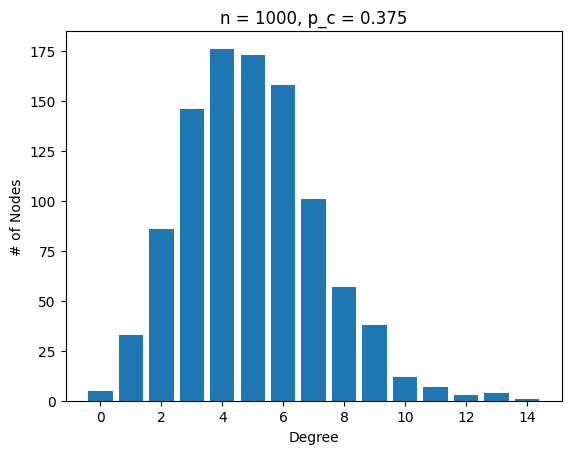

In [24]:
sample1 = [0, 0]
sample2 = [3, 3]

plt.bar(*np.unique(degree_distribution[sample1[0]][sample1[1]], return_counts=True))
plt.title("n = " + str(f_table[0][sample1[0]]) + ", p_c = " + str(f_table[1][sample1[1]]))
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.show()

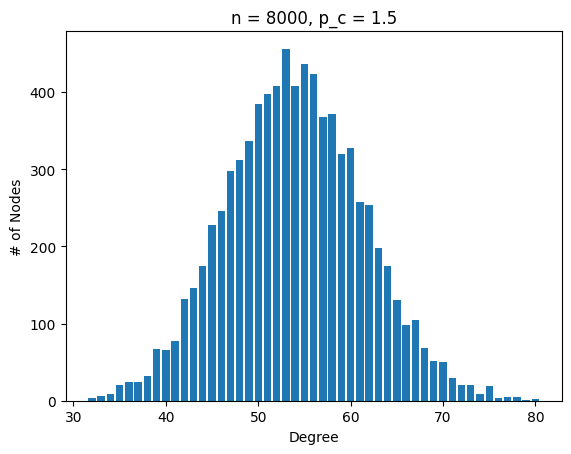

In [25]:
plt.bar(*np.unique(degree_distribution[sample2[0]][sample2[1]], return_counts=True))
plt.title("n = " + str(f_table[0][sample2[0]]) + ", p_c = " + str(f_table[1][sample2[1]]))
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.show()

С увеличением $p$ пик графика смещается в сторонну увеличения степеней.

С ростом $n$ структура графика не меняется, но он становится более гладким за счёт увеличения размера выборки.

## 3 Пример случайного графа

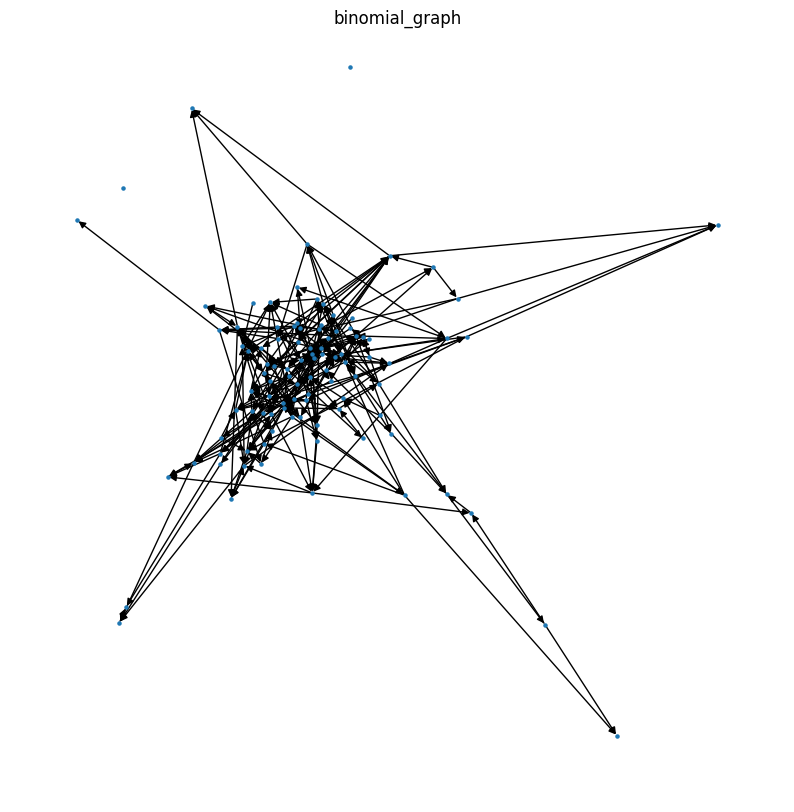

In [26]:
n_v = 100
p_c_v = 0.5
graph = nx.erdos_renyi_graph(n_v, p_c_v*np.log(n_v)/n_v, directed = True)
plt.figure(figsize=(10, 10))
plt.title('binomial_graph')
nx.draw(graph, node_size=5)
plt.show()